<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/Regression_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd  

import numpy as np
import os


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

from sklearn import metrics

from six import StringIO
  
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [ ]:
Working_Data = pd.read_csv("Working_data_2.csv") 
Working_Data.head()

,Date,Quantity,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4,IEClag_5,ISElag_6,Gray_cement_dispatch_Factorylag_9,ICElag_9,Housing_total_sales,Housing_total_initiation_SIlag_24,Ordinary_creditlag_4,Ordinary_creditlag_6,working_day
0,0,1.503548,0.699923,502084.8330,102.548972,69.107759,-0.8,99.983258,246590.9825,-23.1,17168,15711,6582407.438,5430545.717,25
1,1,0.076213,0.316156,530826.1625,102.919033,61.576356,-0.5,102.844455,235505.0780,-17.1,16196,7515,5823639.090,7116995.809,24
2,2,-1.346258,-0.267695,568447.4880,102.162670,57.195909,-4.2,103.209393,241604.7690,-10.8,15388,5744,7940658.711,6582407.438,26
3,3,-2.122585,-2.419870,477863.7565,102.983586,60.038831,-4.7,103.057448,224013.6000,-19.9,14481,5445,7880889.537,5823639.090,23
4,4,-0.665067,-0.644222,521968.2200,103.070062,63.974909,-16.1,103.353834,236576.3735,-15.3,14347,7567,4498496.510,7940658.711,25


In [ ]:
Working_Data.drop(columns=['Date'])

In [ ]:
X = Working_Data.iloc[:,2:15] # Features
y = Working_Data.iloc[:,1]



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=2) 

In [ ]:
TreeReg = DecisionTreeRegressor()
TreeReg.fit(X_train, y_train)

y_pred_Train = TreeReg.predict(X_train)
y_pred_Test = TreeReg.predict(X_test)

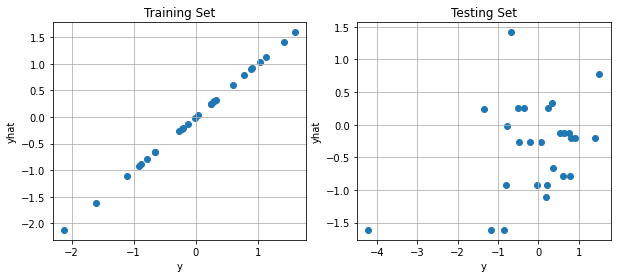

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

ax[0].scatter(y_train, y_pred_Train)
ax[0].grid()
ax[0].set_xlabel('y')
ax[0].set_ylabel('yhat')
ax[0].set_title('Training Set')

ax[1].scatter(y_test, y_pred_Test)
ax[1].grid()
ax[1].set_xlabel('y')
ax[1].set_ylabel('yhat')
ax[1].set_title('Testing Set')
plt.show()

In [ ]:
print('R squared:', metrics.r2_score(y_train, y_pred_Train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

R squared: 1.0
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [ ]:
print('R squared:', metrics.r2_score(y_test, y_pred_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))

R squared: -0.011326339953003028
Mean Absolute Error: 0.9047960785925925
Mean Squared Error: 1.2059581664928092
Root Mean Squared Error: 1.0981612661593967


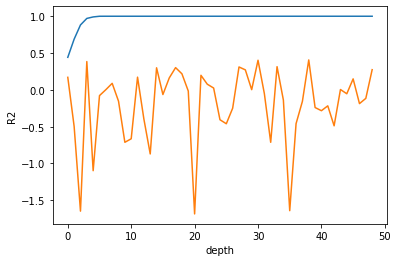

In [ ]:
train_R2 =[]
test_R2=[]

for depth in range(1,50):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5) 
    dtree = DecisionTreeRegressor(max_depth=depth)
    dtree.fit(X_train,y_train)
    y_pred_Train = dtree.predict(X_train) #Predictions
    y_pred_Test = dtree.predict(X_test) #Predictions
    train_R2.append(metrics.r2_score(y_train,y_pred_Train))
    test_R2.append(metrics.r2_score(y_test, y_pred_Test))

plt.plot(train_R2)
plt.plot(test_R2)
plt.ylabel('R2')
plt.xlabel('depth')
plt.show()

[Text(126.85781250000001, 205.35999999999999, 'X[8] <= 14527.0\nsquared_error = 0.798\nsamples = 27\nvalue = 0.008'),
 Text(41.85, 181.2, 'X[1] <= 494372.234\nsquared_error = 0.249\nsamples = 6\nvalue = -1.218'),
 Text(20.925, 157.04, 'X[7] <= -14.55\nsquared_error = 0.065\nsamples = 2\nvalue = -1.867'),
 Text(10.4625, 132.88, 'squared_error = 0.0\nsamples = 1\nvalue = -2.123'),
 Text(31.387500000000003, 132.88, 'squared_error = 0.0\nsamples = 1\nvalue = -1.612'),
 Text(62.775000000000006, 157.04, 'X[10] <= 5589156.75\nsquared_error = 0.025\nsamples = 4\nvalue = -0.893'),
 Text(52.3125, 132.88, 'squared_error = 0.0\nsamples = 1\nvalue = -0.665'),
 Text(73.2375, 132.88, 'X[9] <= 4383.5\nsquared_error = 0.01\nsamples = 3\nvalue = -0.969'),
 Text(62.775000000000006, 108.72, 'squared_error = 0.0\nsamples = 1\nvalue = -1.109'),
 Text(83.7, 108.72, 'X[9] <= 4806.0\nsquared_error = 0.0\nsamples = 2\nvalue = -0.899'),
 Text(73.2375, 84.56, 'squared_error = 0.0\nsamples = 1\nvalue = -0.88'),
 T

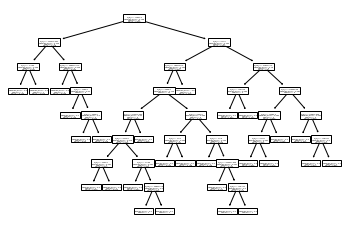

In [ ]:
plot_tree(TreeReg)

In [ ]:
Tree_Train_R2 = []
Tree_Test_R2 = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    TreeReg = DecisionTreeRegressor()
    TreeReg.fit(X_train, y_train)
    y_pred_Train  = TreeReg.predict(X_train)  
    y_pred_Test  = TreeReg.predict(X_test)
    Tree_Train_R2.append(metrics.r2_score(y_train, y_pred_Train))
    Tree_Test_R2.append(metrics.r2_score(y_test, y_pred_Test))

In [ ]:
LR_Train_R2 = []
LR_Test_R2 = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    LinearReg = LinearRegression() #Creates the function
    LinearReg.fit(X_train, y_train) #Train the model
    y_pred_Train  = LinearReg.predict(X_train)  #Predictions on testing model
    y_pred_Test  = LinearReg.predict(X_test)  #Predictions on testing model
    LR_Train_R2.append(metrics.r2_score(y_train, y_pred_Train))
    LR_Test_R2.append(metrics.r2_score(y_test, y_pred_Test))

In [ ]:
Train = pd.DataFrame(list(zip(Tree_Train_R2, LR_Train_R2)))
Test = pd.DataFrame(list(zip(Tree_Test_R2, LR_Test_R2)))

In [ ]:
Train

,0,1
0,1.0,0.883301
1,1.0,0.812678
2,1.0,0.818464
3,1.0,0.875220
4,1.0,0.893040
...,...,...
995,1.0,0.876550
996,1.0,0.888324
997,1.0,0.877937
998,1.0,0.800251


In [ ]:
Test

,0,1
0,-3.843837,0.307343
1,0.022100,0.869209
2,-13.606082,0.783512
3,0.216781,0.240839
4,-0.314871,-0.212315
...,...,...
995,-1.059038,0.564422
996,0.177308,0.291498
997,-0.591947,0.427900
998,0.317077,0.899623


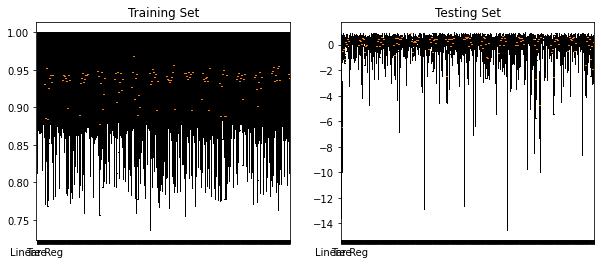

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].boxplot(Train)
ax[0].set_title('Training Set')
ax[0].set_xticklabels(['Tree','Linear Reg'])

ax[1].boxplot(Test)
ax[1].set_title('Testing Set')
ax[1].set_xticklabels(['Tree','Linear Reg'])

plt.show()